In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
mushrooms_df = pd.read_excel("")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### EDA

In [ ]:

# View the data
print("\nFirst few rows:")
print(mushrooms_df.head())

# Explore data shape and information
print("\nData shape:")
print(mushrooms_df.shape)

print("\nData information:")
print(mushrooms_df.info())

# Handle missing values
print("\nMissing values per column:")
print(mushrooms_df.isnull().sum())



First few rows:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p      

The dataset contains 23 columns, where each column represents a specific feature of the mushroom. The "class" column indicates whether the mushroom is poisonous (p) or edible (e). The other columns contain various attributes of the mushrooms, encoded as single-letter abbreviations.



In [ ]:
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushrooms_df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## Class Distribution

To begin our analysis, we'll visualize the distribution of the mushrooms based on their edibility. This will provide an overview of the number of edible versus poisonous mushrooms in the dataset.

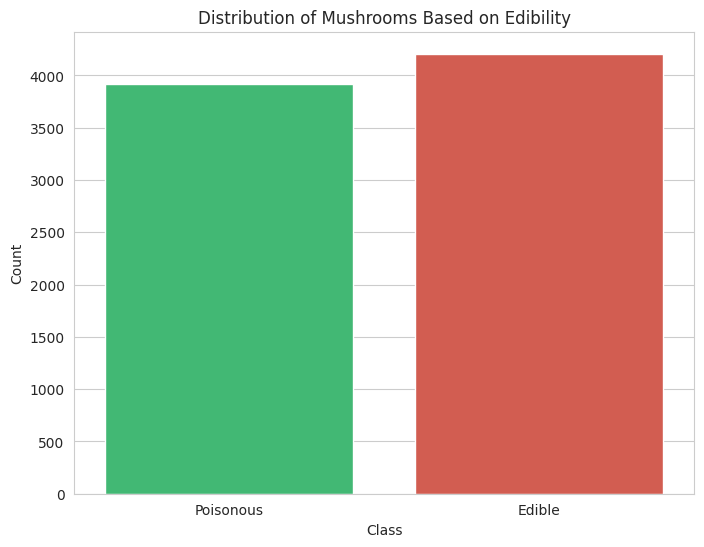

In [ ]:
# Plotting the distribution of mushrooms based on their edibility
plt.figure(figsize=(8, 6))
sns.countplot(data=mushrooms_df, x='class', palette=['#2ECC71', '#E74C3C'])
plt.title('Distribution of Mushrooms Based on Edibility')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Poisonous', 'Edible'])

plt.show()

The visualization shows the distribution of mushrooms based on their edibility. We can observe that the dataset has a relatively balanced number of poisonous and edible mushrooms.


## Distribution of features against edibility

Visualizing the distribution of some interesting features against the edibility of mushrooms.

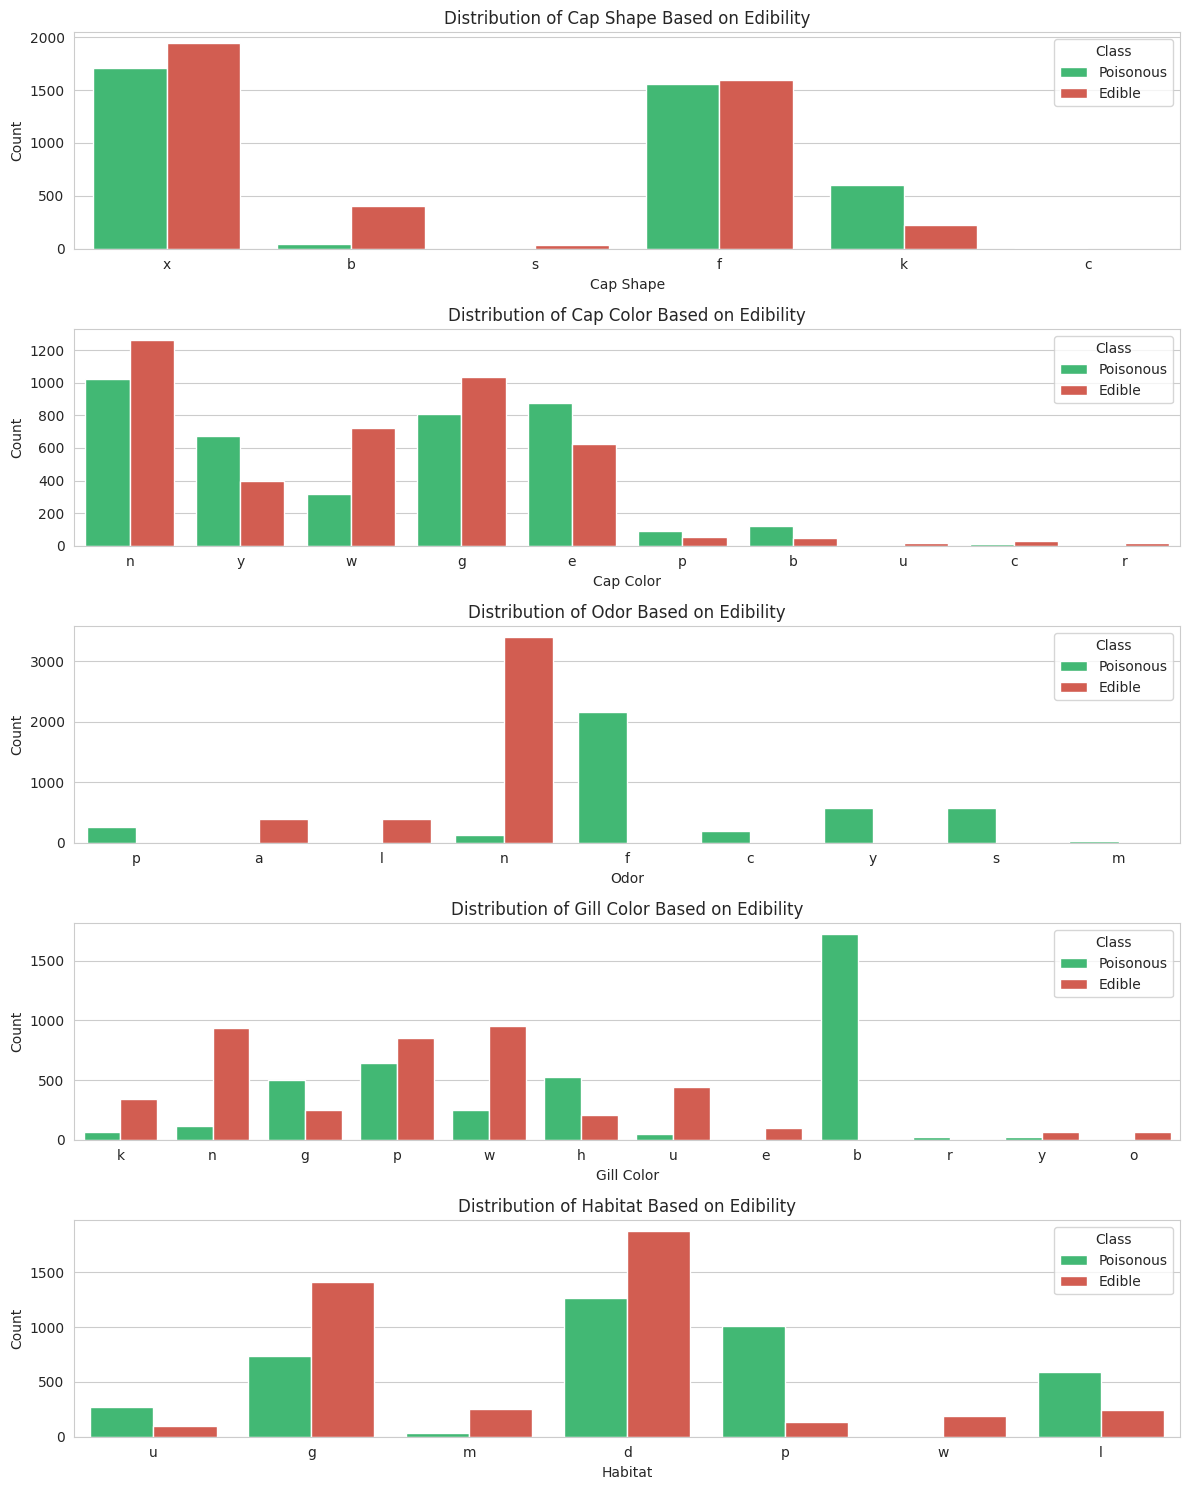

In [ ]:

features = ['cap-shape', 'cap-color', 'odor', 'gill-color', 'habitat']

# Plotting the distribution of selected features against mushroom edibility
fig, axs = plt.subplots(nrows=len(features), figsize=(12, 15))

for i, feature in enumerate(features):
    sns.countplot(data=mushrooms_df, x=feature, hue='class', ax=axs[i], palette=['#2ECC71', '#E74C3C'])
    axs[i].set_title(f'Distribution of {feature.replace("-", " ").title()} Based on Edibility')
    axs[i].set_xlabel(feature.replace("-", " ").title())
    axs[i].set_ylabel('Count')
    axs[i].legend(title='Class', labels=['Poisonous', 'Edible'])

plt.tight_layout()
plt.show()


## Data preprocessing

In [ ]:
mushdf = pd.get_dummies(mushrooms_df)

mushdf.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Decision Tree Modeling

In [ ]:
X_mush = mushdf.iloc[:,2:]
y_mush = mushdf.iloc[:,1] # class_p (0=edible, 1=poisonous)

X_train, X_test, y_train, y_test = train_test_split(X_mush, y_mush, random_state=650)


In [ ]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)

fimportance = list(zip(X_train.columns, dtc.feature_importances_))
fimportance.sort(key = lambda x: x[1], reverse=True)

fimportance

[('odor_n', 0.6137353095870153),
 ('stalk-root_c', 0.18191140160360036),
 ('stalk-surface-below-ring_y', 0.0976954057277749),
 ('spore-print-color_r', 0.03252554203474399),
 ('odor_l', 0.02402817819211948),
 ('odor_a', 0.023351290812923947),
 ('population_c', 0.01788771980197528),
 ('stalk-root_b', 0.005574744927164158),
 ('cap-surface_g', 0.0026166653108328094),
 ('cap-shape_c', 0.0006554783339812177),
 ('gill-size_b', 1.8263667868635858e-05),
 ('cap-shape_b', 0.0),
 ('cap-shape_f', 0.0),
 ('cap-shape_k', 0.0),
 ('cap-shape_s', 0.0),
 ('cap-shape_x', 0.0),
 ('cap-surface_f', 0.0),
 ('cap-surface_s', 0.0),
 ('cap-surface_y', 0.0),
 ('cap-color_b', 0.0),
 ('cap-color_c', 0.0),
 ('cap-color_e', 0.0),
 ('cap-color_g', 0.0),
 ('cap-color_n', 0.0),
 ('cap-color_p', 0.0),
 ('cap-color_r', 0.0),
 ('cap-color_u', 0.0),
 ('cap-color_w', 0.0),
 ('cap-color_y', 0.0),
 ('bruises_f', 0.0),
 ('bruises_t', 0.0),
 ('odor_c', 0.0),
 ('odor_f', 0.0),
 ('odor_m', 0.0),
 ('odor_p', 0.0),
 ('odor_s', 0.0),

In [ ]:
from sklearn.feature_selection import SelectFromModel


In [ ]:
selected = SelectFromModel(dtc, prefit=True, threshold='.01*mean')

feature_mask = selected.get_support(indices=False)

X_mush_selected = X_mush[ X_mush.columns[feature_mask] ]
X_mush_selected.columns


Index(['cap-shape_c', 'cap-surface_g', 'odor_a', 'odor_l', 'odor_n',
       'stalk-root_b', 'stalk-root_c', 'stalk-surface-below-ring_y',
       'spore-print-color_r', 'population_c'],
      dtype='object')

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush_selected, y_mush, random_state=650)

dtc2 = DecisionTreeClassifier().fit(X_train2,y_train2)

#feature importances
fimportance_selected = list(zip(X_train2.columns, dtc2.feature_importances_))
fimportance_selected.sort(key = lambda x: x[1], reverse=True)

fimportance_selected

[('odor_n', 0.6137353095870153),
 ('stalk-root_c', 0.1819114016036004),
 ('stalk-surface-below-ring_y', 0.09769540572777491),
 ('spore-print-color_r', 0.032525542034744),
 ('odor_l', 0.024028178192119484),
 ('odor_a', 0.02335129081292395),
 ('population_c', 0.016604728319962715),
 ('stalk-root_b', 0.006876000077045362),
 ('cap-surface_g', 0.0026166653108328094),
 ('cap-shape_c', 0.0006554783339812178)]

In [ ]:
print('Mushroom dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(dtc2.score(X_train2, y_train2)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(dtc2.score(X_test2, y_test2)))

Mushroom dataset: decision tree
Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 1.00


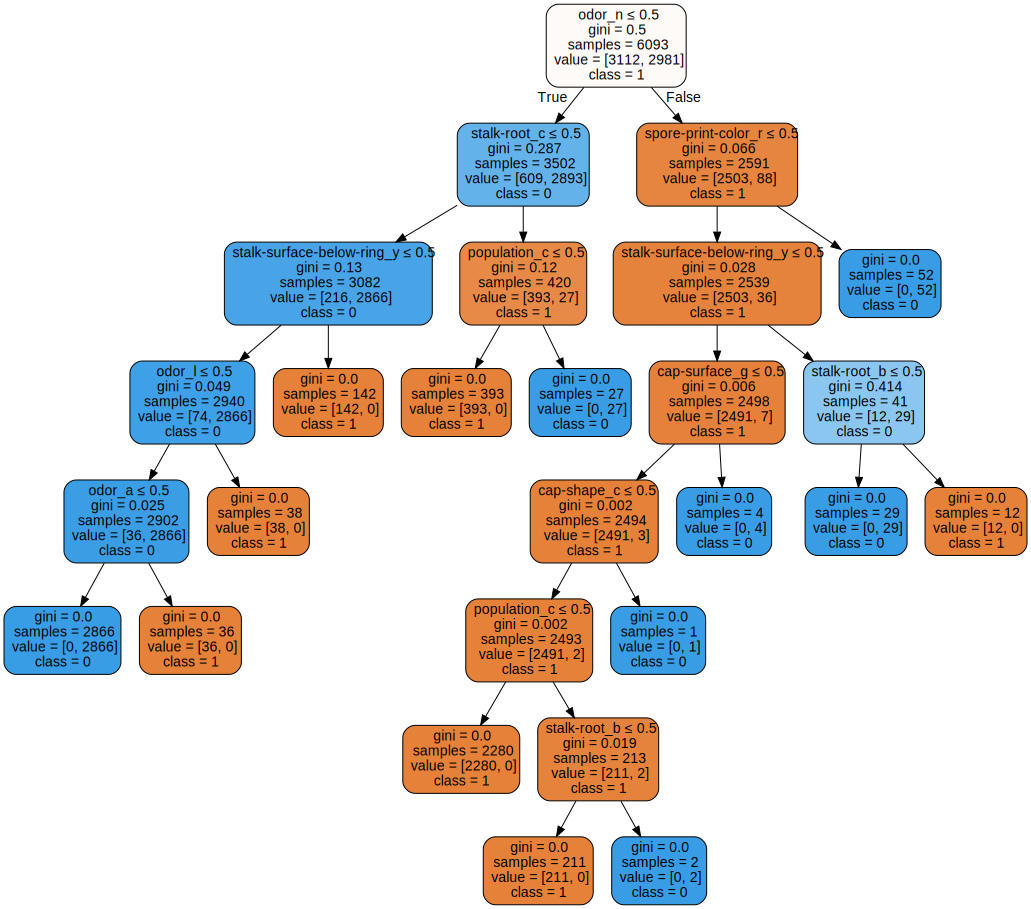

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# Create a decision tree classifier (replace with your actual model)
clf = DecisionTreeClassifier()

# Fit the model on your data
clf.fit(X_train2, y_train2)


# Convert class labels to strings
y_train_str = y_train2.astype(str)

# Export the decision tree to DOT format
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_train2.columns,
                           class_names=y_train_str.unique(),  # Use the string version
                           filled=True, rounded=True,
                           special_characters=True)

# Render the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph


In [ ]:

from sklearn.metrics import classification_report, accuracy_score


# Make predictions on the test data
y_pred = clf.predict(X_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred)

# Generate a classification report
class_report = classification_report(y_test2, y_pred)

# Print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1096
           1       1.00      1.00      1.00       935

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Feature Importance

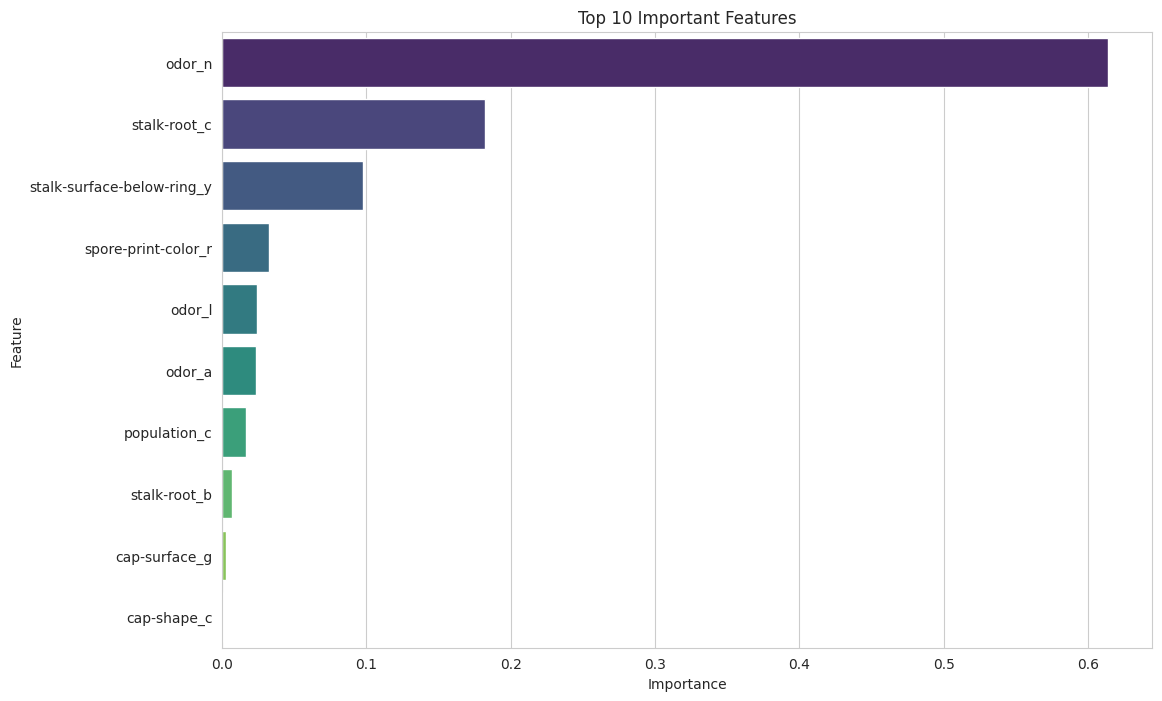

In [ ]:
# Extracting feature importances from the trained model
feature_importances = clf.feature_importances_

# Creating a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame based on importance values
sorted_features_df = features_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting the top 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_features_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Tree Pruning

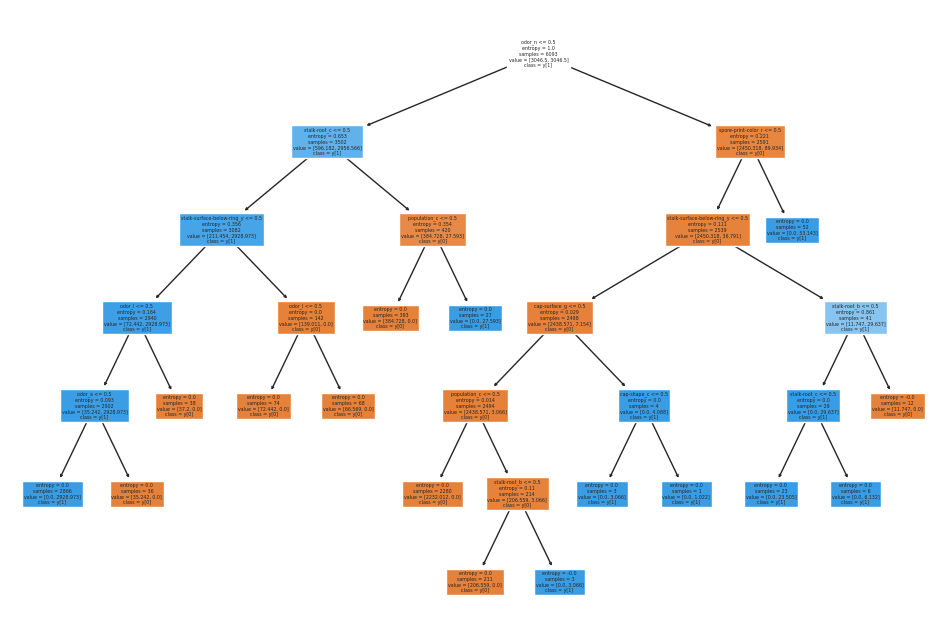

Accuracy: 1.0


In [ ]:
import numpy as np
# Build the classification tree with RPART
tree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')  # Use 'balanced' class weights
tree.fit(X_train2, y_train2)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X_train2.columns, class_names=True, filled=True)
plt.show()

# Calculate the validation errors for different values of ccp_alpha
ccp_alphas, validation_erroZreeClassifier(criterion='entropy', class_weight='balanced', ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train2, y_train2)
    y_pred = pruned_tree.predict(X_test2)
    accuracy = confusion_matrix(y_test2, y_pred).trace() / confusion_matrix(y_test2, y_pred).sum()
    validation_errors.append(1 - accuracy)
    ccp_alphas.append(ccp_alpha)

# Choose the best complexity parameter `cp` to prune the tree
cp_optim = ccp_alphas[np.argmin(validation_errors)]

# Prune the tree using the best complexity parameter
pruned_tree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', ccp_alpha=cp_optim)
pruned_tree.fit(X_train2, y_train2)

# Test the pruned model
y_pred = pruned_tree.predict(X_test2)

# Calculate accuracy
accuracy = confusion_matrix(y_test2, y_pred).trace() / confusion_matrix(y_test2, y_pred).sum()

print("Accuracy:", accuracy)
